Agenda for today .
- Get day data 
https://stackoverflow.com/questions/72338333/yahoo-finance-download-specific-time-frames-of-hisotrical-data

In [15]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [16]:
import yfinance as yf
stock_name= "TCS.NS"
data_of_the_day = yf.download(stock_name, period="1d" ,interval = "1m")
print(data_of_the_day)


[*********************100%%**********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Datetime                                                                        
2023-09-26 09:15:00+05:30  3569.350098  3569.350098  3556.800049  3558.550049   
2023-09-26 09:16:00+05:30  3559.949951  3564.800049  3558.399902  3558.399902   
2023-09-26 09:17:00+05:30  3560.500000  3562.550049  3557.100098  3562.000000   
2023-09-26 09:18:00+05:30  3562.100098  3566.449951  3559.050049  3563.850098   
2023-09-26 09:19:00+05:30  3564.300049  3565.899902  3559.050049  3560.149902   
...                                ...          ...          ...          ...   
2023-09-26 15:25:00+05:30  3590.699951  3591.100098  3590.699951  3591.050049   
2023-09-26 15:26:00+05:30  3591.100098  3591.800049  3590.050049  3591.000000   
2023-09-26 15:27:00+05:30  3591.000000  3591.600098  3590.000000  3590.199951   
2023-09-26 15:28:00+05:30  3590.350098  

https://algotrading101.com/learn/sklearn-guide/

Thus we will explore later in the article the three main problem classifications:

    regression
    classification
    clustering


https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9

In [17]:
!pip install -U scikit-learn
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
df = pd.DataFrame(data_of_the_day)
df.head(10)
x = df.index
y = df['Close']

In [19]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
import matplotlib.pyplot as plt
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x.to_numpy(), y.to_numpy(), color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

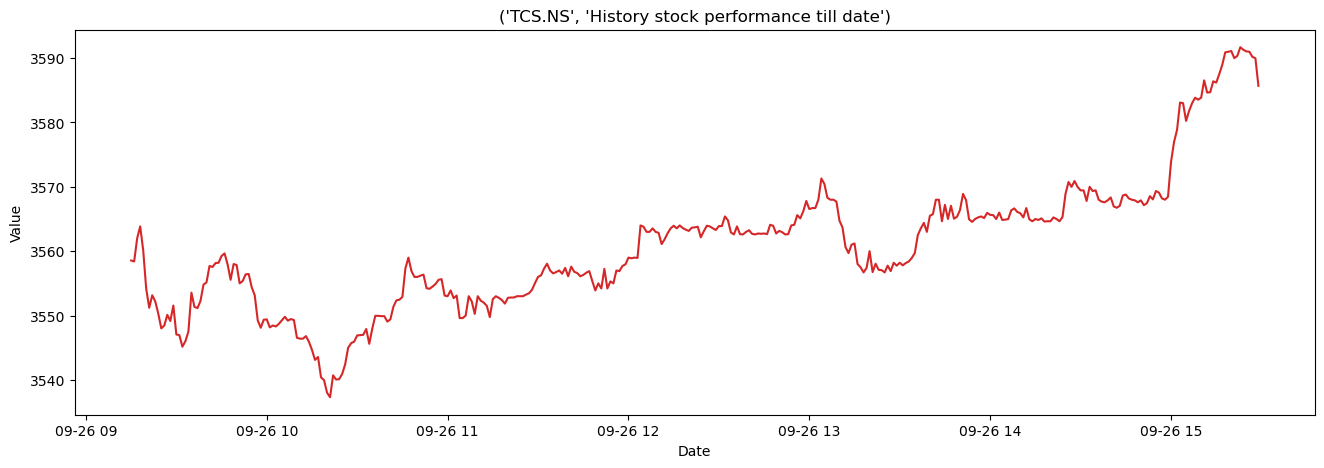

In [20]:

title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [28]:
# Data Processing and scaling
df.reset_index(drop=True,inplace=True) # to reset index and convert it to column
df.head(2)


,level_0,index,Datetime,Open,High,Low,Close,Adj Close,Volume
0,0,0,2023-09-26 09:15:00+05:30,3569.350098,3569.350098,3556.800049,3558.550049,3558.550049,0
1,1,1,2023-09-26 09:16:00+05:30,3559.949951,3564.800049,3558.399902,3558.399902,3558.399902,11651


In [31]:
#df.columns ['date','open','high','low','close','vol','divs','split']
#df.drop(columns=['divs','split']).head(2) # We are dropping un necessary columns from the set
#df['date'] = pd.to_datetime(df.date)
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data_of_the_day.join(data_of_the_day[predictors]).iloc[1:]

ValueError: columns overlap but no suffix specified: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')